1) USING GRADIENT

**Get Dataset**

**Loss Function** (Mean Squared - MSR):
define the loss function, which measures the difference between the predicted values and the actual values.

**Gradient Descent**:
 implement the gradient descent algorithm to optimize the model's parameters (weights) based on the calculated gradients.

**Train Model**:
 use the gradient descent algorithm to train our linear regression model on the dataset.





In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Read data from CSV file
df = pd.read_csv('/content/drive/MyDrive/machine_learning/datasets/Salary_dataset.csv')

# Extract columns
x = df['Salary']
y = df['YearsExperience']
n = np.size(x)


In [ ]:
# Preprocessing
x_mean = np.mean(x)
x_std = np.std(x)
x = (x - x_mean) / x_std
X = np.column_stack((np.ones(n), x))

y_mean = np.mean(y)
y_std = np.std(y)
y = (y - y_mean) / y_std
Y = np.column_stack((np.ones(n), y))

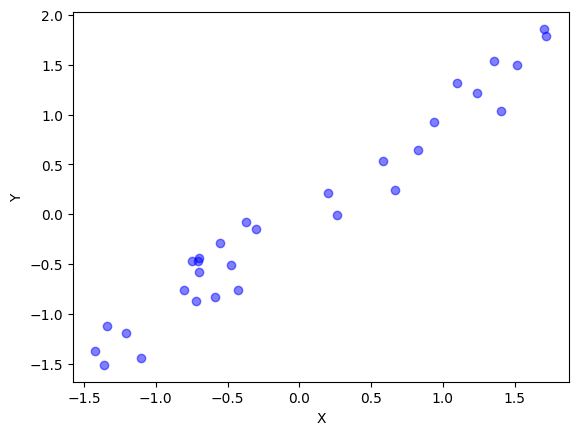

In [ ]:
from matplotlib import pyplot as plt
plt.scatter(x,y, c = "blue",alpha=.5, marker = 'o')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [ ]:
def h(X, w):
    return w[1] * X[:, 1] + w[0]

In [ ]:
#w-weights
#x-input/features
#y-output
def cost(w, X, y):
    return (1 / n) * np.sum(np.square(h(X, w) - y))

In [ ]:
#partial derivative
def grad(w, X, y):
    g = [0] * 2
    g[0] = (1 / n) * np.sum(h(X, w) - y)
    g[1] = (1 / n) * np.sum((h(X, w) - y) * X[:, 1])
    return g


In [ ]:
def descent(w_new, w_prev, lr, X, y):
    j = 0
    while True:
        w_prev = w_new
        w0 = w_prev[0] - lr * grad(w_prev, X, y)[0]
        w1 = w_prev[1] - lr * grad(w_prev, X, y)[1]
        w_new = [w0, w1]
        if (w_new[0] - w_prev[0])**2 + (w_new[1] - w_prev[1])**2 <= 1e-6:   #0.2
            return w_new
        if j > 1000:
            return w_new
        j += 1


In [ ]:
w = [0, 0]

In [ ]:
w = descent(w, w, 0.1, X, y)
w

[3.338070560706303e-16, 0.9697035612818027]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


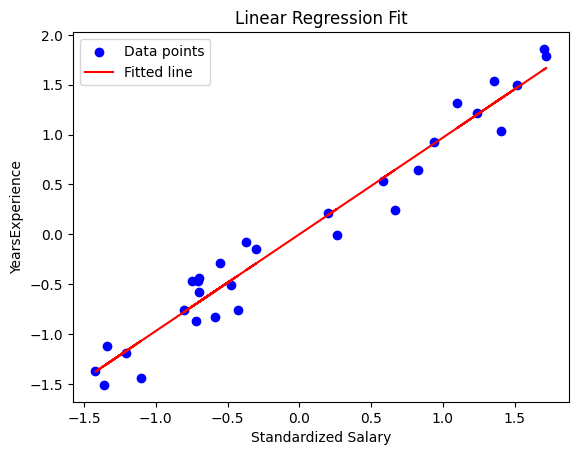

In [ ]:
plt.scatter(x, y, color='blue', label='Data points')
plt.plot(x, h(X, w), color='red', label='Fitted line')
plt.xlabel('Standardized Salary')
plt.ylabel('YearsExperience')
plt.title('Linear Regression Fit')
plt.legend()
plt.show()


2) USING DIFFERENT ERROR TYPES

In [ ]:
import statistics
import math

class LinearRegression:
    def __init__(self):
        self.slope = None
        self.intercept = None
        self.r_squared = None
        self.root_mean_squared_error = None
        self.mean_absolute_error = None
        self.mean_squared_error = None

    def fit(X, Y):
        x_mean = statistics.mean(X)
        y_mean = statistics.mean(Y)
        x_squared_mean = statistics.mean([x**2 for x in X])
        xy_mean = statistics.mean([x*y for x, y in zip(X, Y)])

        # Calculate slope and intercept of the line
        slope = (x_mean * y_mean - xy_mean) / (x_mean**2 - x_squared_mean)
        intercept = y_mean - slope * x_mean

        # Calculate R-squared to evaluate the goodness of fit
        y_predicted = [slope * x + intercept for x in X]
        ss_res = sum((y - y_pred)**2 for y, y_pred in zip(Y, y_predicted))
        ss_tot = sum((y - y_mean)**2 for y in Y)
        r_squared = 1 - (ss_res / ss_tot)

        # Calculate adjusted R-squared
        n = len(X)
        k = 1  # Number of predictors (features)
        adjusted_r_squared = 1 - ((1 - r_squared) * (n - 1) / (n - k - 1))

        # Calculate Root Mean Squared Error (RMSE) and Mean Squared Error (MSE)
        squared_errors = [(y - y_pred)**2 for y, y_pred in zip(Y, y_predicted)]
        mean_squared_error = statistics.mean(squared_errors)
        root_mean_squared_error = math.sqrt(mean_squared_error)

        return slope, intercept, r_squared, adjusted_r_squared, root_mean_squared_error, mean_squared_error

    def mean_absolute_error(X, Y, slope, intercept):
        # Calculate Mean Absolute Error (MAE)
        y_predicted = [slope * x + intercept for x in X]
        absolute_errors = [abs(y - y_pred) for y, y_pred in zip(Y, y_predicted)]
        mean_absolute_error = statistics.mean(absolute_errors)
        return mean_absolute_error

    def root_mean_squared_error(root_mean_squared_error):
        # Return Root Mean Squared Error (RMSE): sqrt(MSE)
        return root_mean_squared_error

    def mean_squared_error(mean_squared_error):
        # Return Mean Squared Error (MSE): (1/n) * Σ(y - ŷ)^2
        return mean_squared_error

    def predict(X, slope, intercept):
        # Make predictions using the fitted model
        y_predicted = [slope * x + intercept for x in X]
        return y_predicted

    def score(r_squared):
        # Return the R-squared score of the model fit
        return r_squared

if __name__ == "__main__":
    X = [1, 2, 3, 4, 5]
    Y = [2, 4, 6, 8, 10]

    # Fit the linear regression model and get the parameters and metrics
    slope, intercept, r_squared, adjusted_r_squared, rmse, mse = LinearRegression.fit(X, Y)

    # Make predictions using the fitted model
    predictions = LinearRegression.predict([7, 8, 9, 10], slope, intercept)

    print("Predictions:", predictions)
    print("R-squared:", LinearRegression.score(r_squared))
    print("Adjusted R-squared:", adjusted_r_squared)
    print("Root Mean Squared Error:", LinearRegression.root_mean_squared_error(rmse))
    print("Mean Absolute Error:", LinearRegression.mean_absolute_error(X, Y, slope, intercept))
    print("Mean Squared Error:", LinearRegression.mean_squared_error(mse))

# Formulas:
# Adjusted R-squared: 1 - ((1 - R-squared) * (n - 1) / (n - k - 1))
# Root Mean Squared Error (RMSE): sqrt(MSE)
# Mean Squared Error (MSE): (1/n) * Σ(y - ŷ)^2


Predictions: [14.0, 16.0, 18.0, 20.0]
R-squared: 1.0
Adjusted R-squared: 1.0
Root Mean Squared Error: 0.0
Mean Absolute Error: 0.0
Mean Squared Error: 0.0


3) MSE - WHY BEST FIT LINE?

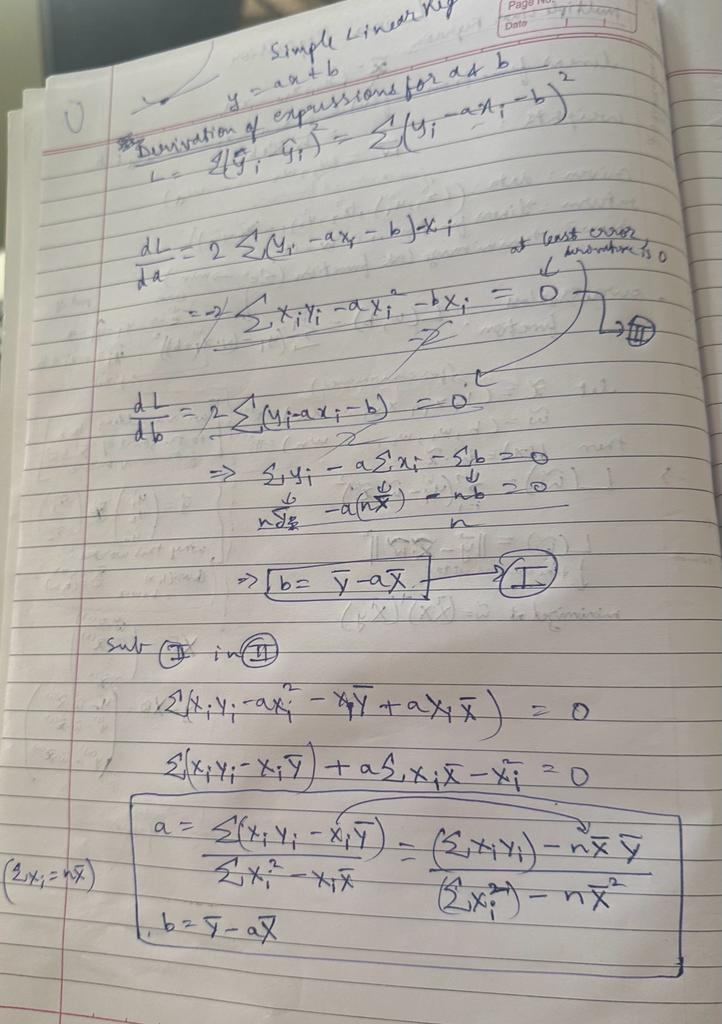

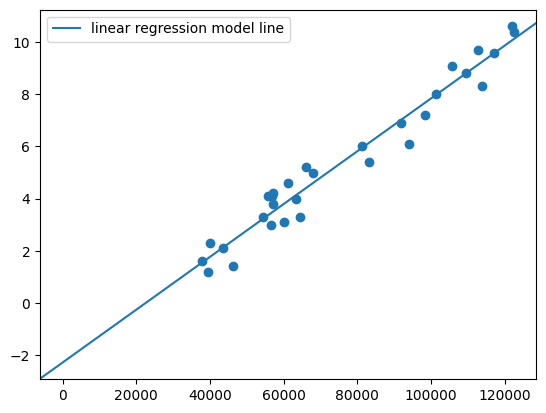

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/machine_learning/datasets/Salary_dataset.csv')

# Extract columns
x = df['Salary']
y = df['YearsExperience']

x_mean,y_mean = np.mean(x),np.mean(y)
a = np.sum((x-x_mean)*(y-y_mean))/np.sum((x-x_mean)**2)
b = y_mean - a*x_mean

fig,ax  = plt.subplots()
ax.scatter(x,y)
ax.axline((0,b),slope=a,color='C0',label='linear regression model line')

ax.legend()

plt.show()

# The best-fit line in linear regression is a mathematical representation of the relationship between
# two variables, such as 'Salary' and 'YearsExperience.' It serves as a predictive model, allowing you to
# make forecasts and understand the strength and direction of the relationship. Additionally, it provides a
# visual means to assess how well the line fits the data and is crucial for model evaluation and inference,
#helping you determine the statistical significance of the relationship.






5) R-SQUARED METHOD

---




Test Set Predictions:
Input: 112636.0, True: 9.7, Predicted: 9.220593450818157
Input: 67939.0, True: 5.0, Predicted: 4.645795459250448
Input: 113813.0, True: 8.299999999999999, Predicted: 9.341060981884564
Input: 83089.0, True: 5.4, Predicted: 6.196418310275143
Input: 64446.0, True: 3.3000000000000003, Predicted: 4.288282217096701
Input: 57190.0, True: 3.8, Predicted: 3.545620870097679

Test Set Accuracy (R-squared): 0.9645401573418148


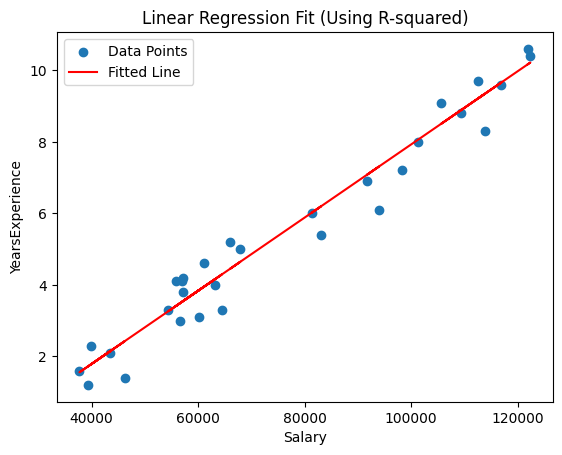

In [ ]:
import statistics
import math
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

class LinearRegression:
    def __init__(self):
        self.slope = None
        self.intercept = None
        self.r_squared = None
        self.root_mean_squared_error = None
        self.mean_absolute_error = None
        self.mean_squared_error = None

    @staticmethod
    def fit(X, Y):
        x_mean = statistics.mean(X)
        y_mean = statistics.mean(Y)
        x_squared_mean = statistics.mean([x**2 for x in X])
        xy_mean = statistics.mean([x*y for x, y in zip(X, Y)])

        # Calculate the slope and intercept of the regression line
        slope = (x_mean * y_mean - xy_mean) / (x_mean**2 - x_squared_mean)
        intercept = y_mean - slope * x_mean

        # Calculate R-squared to evaluate the goodness of fit
        y_predicted = [slope * x + intercept for x in X]
        ss_res = sum((y - y_pred)**2 for y, y_pred in zip(Y, y_predicted))
        ss_tot = sum((y - y_mean)**2 for y in Y)
        r_squared = 1 - (ss_res / ss_tot)

        return slope, intercept, r_squared

if __name__ == "__main__":
    df = pd.read_csv('/content/drive/MyDrive/machine_learning/datasets/Salary_dataset.csv')
    x = df['Salary']
    y = df['YearsExperience']

    # Split the data into a training set (80%) and a test set (20%)
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    # Fit the linear regression model on the training data
    slope, intercept, r_squared = LinearRegression.fit(x_train, y_train)

    # Make predictions on the training data
    y_train_predicted = [slope * xi + intercept for xi in x_train]

    # Make predictions on the test data
    y_test_predicted = [slope * xi + intercept for xi in x_test]

    # Print the input test values and predicted values for the test set
    print("\nTest Set Predictions:")
    for xi, y_true, y_pred in zip(x_test, y_test, y_test_predicted):
        print(f"Input: {xi}, True: {y_true}, Predicted: {y_pred}")

    # Calculate and print the accuracy (R-squared) for the test set
    print("\nTest Set Accuracy (R-squared):", r_squared)

    # Plot the data points and the fitted line
    plt.scatter(x, y, label='Data Points')
    plt.plot(x, [slope * xi + intercept for xi in x], color='red', label='Fitted Line')
    plt.xlabel('Salary')
    plt.ylabel('YearsExperience')
    plt.legend()
    plt.title('Linear Regression Fit (Using R-squared)')

    # Show the plot
    plt.show()


5) USING SCIKIT-LEARN LIBRARIES

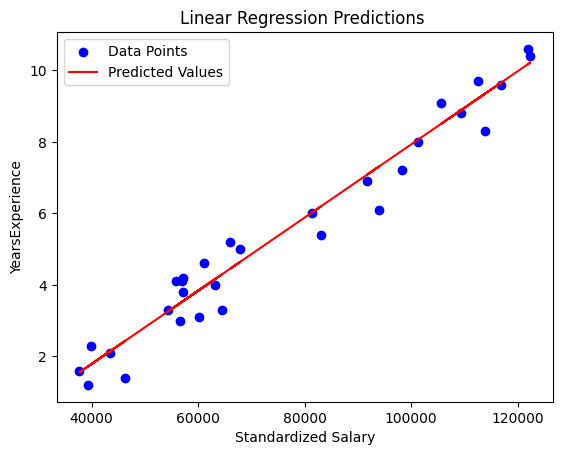

Test Accuracy: 0.9039484379486217
Input: 39344.0, True: 1.2000000000000002, Predicted: 1.719058797530903
Input: 46206.0, True: 1.4, Predicted: 2.4213937152689526
Input: 37732.0, True: 1.6, Predicted: 1.5540684321281435
Input: 43526.0, True: 2.1, Predicted: 2.1470921152196993
Input: 39892.0, True: 2.3000000000000003, Predicted: 1.7751473336603771
Input: 56643.0, True: 3.0, Predicted: 3.4896346853115094
Input: 60151.0, True: 3.1, Predicted: 3.8486831976147853
Input: 54446.0, True: 3.3000000000000003, Predicted: 3.264768784077103
Input: 64446.0, True: 3.3000000000000003, Predicted: 4.288282217096703
Input: 57190.0, True: 3.8, Predicted: 3.5456208700976815
Input: 63219.0, True: 4.0, Predicted: 4.162697118865198
Input: 55795.0, True: 4.1, Predicted: 3.4028407461914467
Input: 56958.0, True: 4.1, Predicted: 3.5218753584516262
Input: 57082.0, True: 4.199999999999999, Predicted: 3.5345669250210694
Input: 61112.0, True: 4.6, Predicted: 3.9470428385279686
Input: 67939.0, True: 5.0, Predicted: 4.6

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

df = pd.read_csv('/content/drive/MyDrive/machine_learning/datasets/Salary_dataset.csv')

x = df['Salary']
y = df['YearsExperience']

x = x.values.reshape(-1, 1)
y = y.values.reshape(-1, 1)

# Split the data into 80% training and 20% testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create a new linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(x_train, y_train)

# Predict on the entire dataset (both training and testing)
y_pred = model.predict(x)

# Plot all data points and the predicted values
plt.scatter(x, y, color='blue', label='Data Points')
plt.plot(x, y_pred, color='red', label='Predicted Values')
plt.xlabel('Standardized Salary')
plt.ylabel('YearsExperience')
plt.title('Linear Regression Predictions ')
plt.legend()
plt.show()

# Calculate and print the test R-squared (final accuracy)
accuracy = r2_score(y_test, model.predict(x_test))
print("Test Accuracy:", accuracy)

# Print the predicted values for the entire dataset
predicted_values = model.predict(x)
for xi, y_true, y_pred in zip(x, y, predicted_values):
    print(f"Input: {xi[0]}, True: {y_true[0]}, Predicted: {y_pred[0]}")


*   y=mx+c,,,,,,,y and x are linearly related to each other

*   m,c are not known- power is 1


